# Lecture 6: Classification and Regression Practice

In this notebook, you will gain more experience creating the classification and regression models we have studied so far using different data sets. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MNIST Data 

Use the `load_digits` function from the `datasets` package to import the MNIST data set. 

#### Explore the data

 -  What is this data?
 ANS : data represents the optical recognition of handwritten digits dataset.
 -  How many samples do we have?
 ANS : We have 1797 samples
 -  How many features?
 ANS : We have 64 features.
 -  What do the features represent?
 ANS : It represents the 8*8 matrix 
 -  What do the targets represent?
 ANS : Target represents the comparison between the actual value of image and the predicted value.It represents the array of numbers ranginf from 0-9
 -  What's the difference between `images` and `data`?
 Ans: 
 -  What shape of data do we need to build a model in `sklearn`?

In [13]:
from sklearn import datasets
MNIST = datasets.load_digits()

In [20]:
dir(MNIST)

['DESCR', 'data', 'images', 'target', 'target_names']

In [31]:
data =MNIST.data
print(data.shape)

(1797, 64)


In [26]:
print(MNIST.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [30]:
print(MNIST.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [29]:
print(MNIST.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

AttributeError: shape

#### Look at a few training samples

Choose a few sample values and look at each one in turn using the code below. Fill in the space noted by ___.  

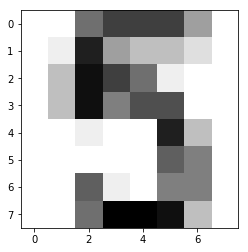

In [38]:
plt.imshow(MNIST.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

#### Build and evaluate a kNN model

In this section you should build a k nearest neighbours model for k = 1 through 8 using a `for` loop. Store the training and test accuracies in lists called `training_accuracy` and `test_accuracy` for subsequent plotting. 

When splitting the data make sure you use the following parameters in addition to the required ones:

 -  `test_size = 0.2`
 -  `random_state = 0`
 -  `stratify = y`

In [54]:
X = MNIST.data
y = MNIST.target
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2,random_state = 0 , stratify = y)


#### Plot the results

In [67]:
X = MNIST.data
y = MNIST.target
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2,random_state = 0 , stratify = y)
from sklearn.neighbors import KNeighborsClassifier
neighbors = [1,2,3,4,5,6,7,8]
train_accuracies = []
test_accuracies = []
for n in neighbors:
    clf= KNeighborsClassifier(n)
    clf.fit(X_train,y_train)
    train_accuracies.append(clf.score(X_train,y_train))
    test_accuracies.append(clf.score(X_test,y_test))
                           
print("TRAINING TEST ACCURACIES",train_accuracies)
print("TRAINING TEST ACCURACIES",test_accuracies)



TRAINING TEST ACCURACIES [1.0, 0.9923451635351427, 0.9916492693110647, 0.9902574808629089, 0.9909533750869868, 0.9902574808629089, 0.9902574808629089, 0.9895615866388309]
TRAINING TEST ACCURACIES [0.9833333333333333, 0.9861111111111112, 0.9861111111111112, 0.9805555555555555, 0.9777777777777777, 0.975, 0.9694444444444444, 0.9666666666666667]


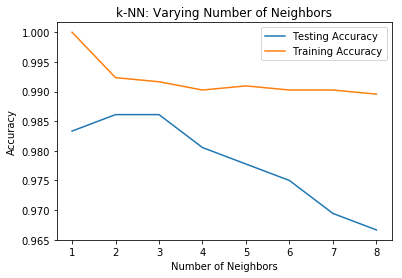

In [69]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracies, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracies, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Choose the best value of k

Using the plot above, which value of k gives you the best results? Why?

ANSWER: k = 3 gives the best results

## Windsor housing data

The file `Housing.csv` contains data on house prices in Windsor back in 1987. 


#### Read in the data

We'll use Pandas to read the data in from the .csv file. Make sure the data file is in the same folder as this notebook.

In [86]:
windsor = pd.read_csv("C:\\Users\Anchal Gupta\Desktop\DAB200\Housing.csv")

In [91]:
dict(windsor)


{'price': 0       42000.0
 1       38500.0
 2       49500.0
 3       60500.0
 4       61000.0
 5       66000.0
 6       66000.0
 7       69000.0
 8       83800.0
 9       88500.0
 10      90000.0
 11      30500.0
 12      27000.0
 13      36000.0
 14      37000.0
 15      37900.0
 16      40500.0
 17      40750.0
 18      45000.0
 19      45000.0
 20      48500.0
 21      65900.0
 22      37900.0
 23      38000.0
 24      42000.0
 25      42300.0
 26      43500.0
 27      44000.0
 28      44500.0
 29      44900.0
          ...   
 516     95000.0
 517     96500.0
 518    101000.0
 519    102000.0
 520    103000.0
 521    105000.0
 522    108000.0
 523    110000.0
 524    113000.0
 525    120000.0
 526    105000.0
 527    106000.0
 528    107500.0
 529    108000.0
 530    113750.0
 531    120000.0
 532     70000.0
 533     71000.0
 534     82000.0
 535     82000.0
 536     82500.0
 537     83000.0
 538     84000.0
 539     85000.0
 540     85000.0
 541     91500.0
 542     94000.0
 543 

#### Take a look at the data

 -  How many samples are there?
 ANS : 546
 -  How many features? 
 ANS : 12
 -  What do you think the target should be? 
 ANS : Price
 -  What data type is the variable `windsor`?
 ANS : Dataframe
 -  Do you notice anything about the data that will cause a problem if we try to use it to build a model
 ANS : Categorical variables

In [71]:
windsor.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


#### Convert categorical data to numeric

Compare the output of `windsor` and `windsor_num`. 

In [73]:
windsor_num = pd.get_dummies(windsor)
windsor_num.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,42000.0,5850,3,1,2,1,0,1,1,0,0,1,1,0,1,0,1,0
1,38500.0,4000,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,49500.0,3060,3,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
3,60500.0,6650,3,1,2,0,0,1,0,1,1,0,1,0,1,0,1,0
4,61000.0,6360,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0


#### Create feature and target data

-  What are the data types of `X_win` and `y_win`?
-  What are the shapes of `X_win` and `y_win`?

In [93]:
# remove 'price' column and keep the rest
X_win = windsor_num.drop(columns = ['price']).values

# keep only the 'price' column as target
y_win = windsor_num['price'].values

In [94]:
print(type(X_win))
print(type(y_win))
print(X_win.shape)
print(y_win.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(546, 17)
(546,)


#### Build and evaluate a linear regression model

-  Does it look like the model is underfitting, just right, or overfitting?

In [98]:
from sklearn.linear_model import LinearRegression
X_train , X_test , y_train , y_test = train_test_split(X_win , y_win , random_state = 0)
from sklearn.neighbors import KNeighborsRegressor
neighbors = [1,2,3,4,5,6,7,8]
train_accuracies = []
test_accuracies = []
for n in neighbors:
    reg= KNeighborsRegressor(n_neighbors = 1)
    reg.fit(X_train,y_train)
    train_accuracies.append(reg.score(X_train,y_train))
    test_accuracies.append(reg.score(X_test,y_test))
                           
print("TRAINING TEST ACCURACIES",train_accuracies)
print("TRAINING TEST ACCURACIES",test_accuracies)


TRAINING TEST ACCURACIES [0.9916722074498855, 0.9916722074498855, 0.9916722074498855, 0.9916722074498855, 0.9916722074498855, 0.9916722074498855, 0.9916722074498855, 0.9916722074498855]
TRAINING TEST ACCURACIES [-0.29993053013736537, -0.29993053013736537, -0.29993053013736537, -0.29993053013736537, -0.29993053013736537, -0.29993053013736537, -0.29993053013736537, -0.29993053013736537]


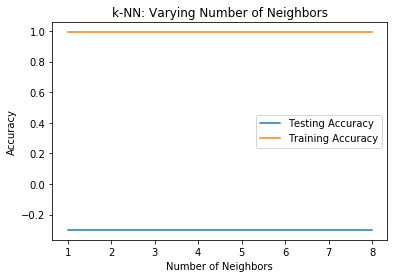

In [99]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracies, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracis, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Wine data

Following a procedure similar to that for the MNIST data, build a kNN classifier for the wine data set. Use the `load_wine` function to get the data. 

## Energy efficiency data

Using what you learned above, build a linear regression model to predict the `heating_load` from the other variables in the building energy efficiency data `energy.csv`. 